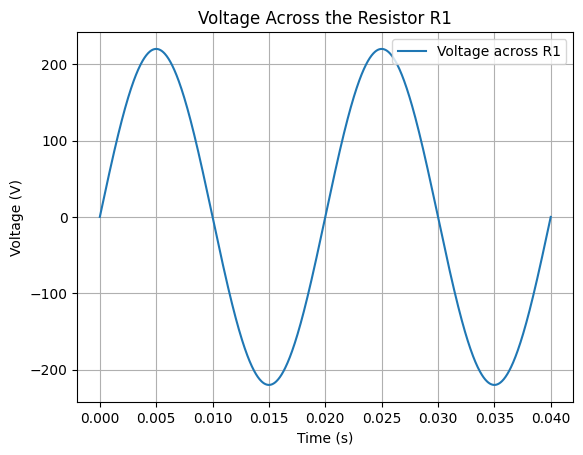

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from lcapy import Circuit

# Define the circuit
cct = Circuit("""
V1 0 2 {220*sin(2*pi*50*t)}
R1 0 3 1
W1 2 4
W2 4 3
""")

# Use time variable for plotting
t = np.linspace(0, 0.04, 1000)  # 0 to 40ms, which gives us a couple of cycles at 50Hz

# Plot the voltage across the resistor
v_R1 = cct.R1.v.evaluate(t)
plt.figure()
plt.plot(t, v_R1, label="Voltage across R1")
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage Across the Resistor R1')
plt.legend()
plt.grid(True)
plt.show()



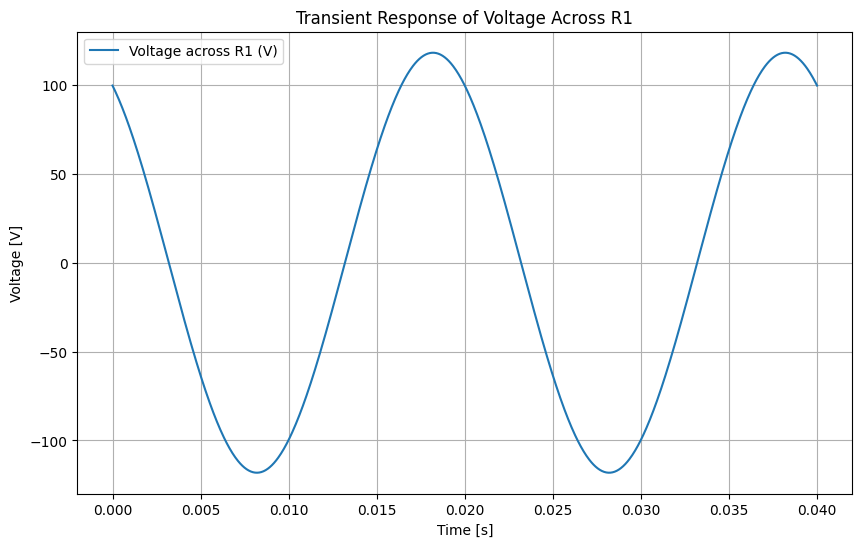

In [32]:
from lcapy import Circuit, t, u
import numpy as np
import matplotlib.pyplot as plt

# Define the circuit
cct = Circuit("""
V1 0 2 {220 * sin(2 * pi * 50 * t)}; down
R1 2 3 50; right
C1 3 4 0.0001; right, size=1.5
W 4 0; up, size=1.5
""")

# Specify the time range for the analysis
time = np.linspace(0, 0.04, 1000)  # Time from 0 to 0.04 seconds, 1000 points

# Evaluate the voltage across R1
v_R1 = cct.C1.v.evaluate(time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, v_R1, label='Voltage across R1 (V)')
plt.title('Transient Response of Voltage Across R1')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(True)
plt.legend()
plt.show()


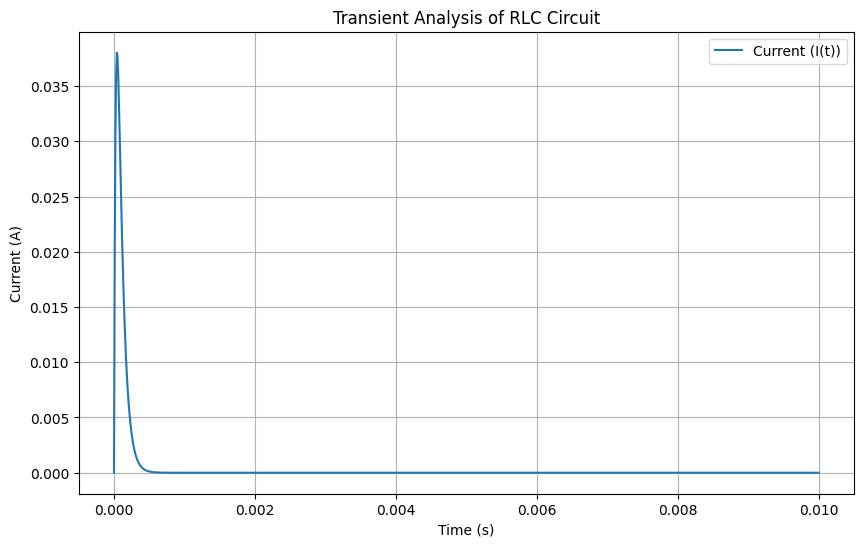

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Circuit parameters
R = 100.0  # Resistance in ohms
L = 0.002  # Inductance in henrys
C = 0.000001  # Capacitance in farads
V0 = 5  # Initial voltage across the capacitor in volts

# Initial conditions
I0 = 0  # Initial current through the inductor
dI0 = V0 / L  # Initial rate of change of current, derived from V = L * dI/dt

# Differential equation
def dIdt(t, y):
    I, dI = y
    d2I = -(R/L)*dI - (1/(L*C))*I
    return [dI, d2I]

# Time span for the simulation
t_span = (0, 0.01)  # 10 ms should show enough of the transient
t_eval = np.linspace(*t_span, 1000)  # Time points where the solution is computed

# Solve the differential equation
sol = solve_ivp(dIdt, t_span, [I0, dI0], t_eval=t_eval, method='RK45')

# Plotting
plt.figure(figsize=(10, 6))

# Current through the circuit
plt.plot(sol.t, sol.y[0], label='Current (I(t))')

plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Transient Analysis of RLC Circuit')
plt.legend()
plt.grid(True)
plt.show()



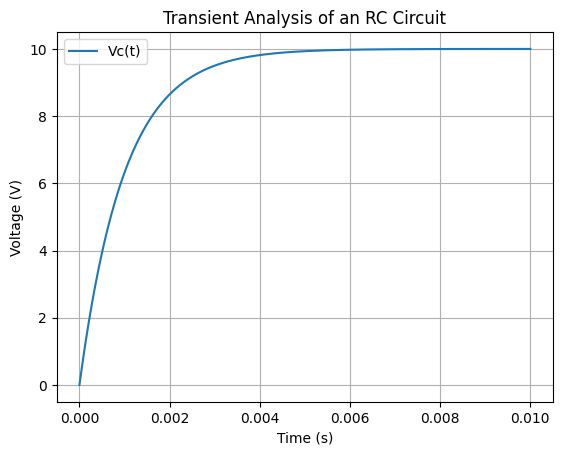

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from lcapy import Circuit

# Define the circuit in netlist format
# Note: Now using explicit values for components (1000 ohms for the resistor, 1e-6 farads for the capacitor)
netlist = """
V1 1 0 step 10; down
R1 1 2 1000; right
C1 2 0 1e-6; right
"""

# Create a Circuit object from the netlist
cct = Circuit(netlist)

# Perform transient analysis from t=0 to t=0.01 seconds
t = np.linspace(0, 0.01, 1000)
vc = cct.C1.v.evaluate(t)

# Plot the result
plt.figure()
plt.plot(t, vc, label='Vc(t)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Transient Analysis of an RC Circuit')
plt.legend()
plt.grid(True)
plt.show()


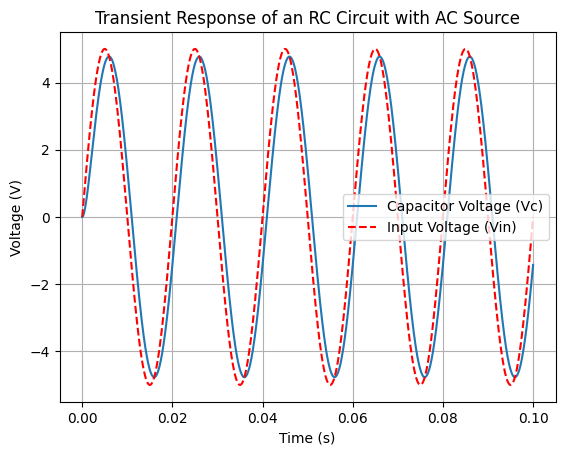

In [33]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# AC Source Parameters
Vmax = 5  # Maximum voltage (V)
frequency = 50  # Frequency (Hz)
omega = 2 * np.pi * frequency  # Angular frequency (rad/s)

# RC Circuit Parameters
R = 1000  # Resistance (Ohms)
C = 1e-6  # Capacitance (Farads)
initial_vc = 0  # Initial voltage across capacitor (V)

# Differential equation for the RC circuit with AC source
def rc_circuit_ac(t, vc):
    Vin = Vmax * np.sin(omega * t)
    return (Vin - vc) / (R * C)

# Time span for the simulation (0 to 0.1 seconds for better visualization of AC behavior)
t_span = [0, 0.1]
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points at which to solve

# Solve the differential equation
sol = solve_ivp(rc_circuit_ac, t_span, [initial_vc], t_eval=t_eval)

# Plot the solution
plt.plot(sol.t, sol.y[0], label='Capacitor Voltage (Vc)')
plt.plot(sol.t, Vmax * np.sin(omega * sol.t), 'r--', label='Input Voltage (Vin)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Transient Response of an RC Circuit with AC Source')
plt.legend()
plt.grid(True)
plt.show()



In [1]:
import pyspice
from pyspice.spice import Simulation

def transient_analysis(netlist_file, voltage_source_name, voltage_source_node, output_node, start_time=0, end_time=100e-9, step_time=1e-9):
  """
  Performs transient analysis on a SPICE netlist.

  Args:
      netlist_file (str): Path to the SPICE netlist file.
      voltage_source_name (str): Name of the voltage source in the netlist.
      voltage_source_node (str): Node connected to the positive terminal of the voltage source.
      output_node (str): Node for which the transient response will be obtained.
      start_time (float, optional): Start time of the simulation (default: 0s).
      end_time (float, optional): End time of the simulation (default: 100ns).
      step_time (float, optional): Time step for the simulation (default: 1ns).

  Returns:
      tuple: A tuple containing the time (x-axis) and voltage (y-axis) data for the transient response.
  """

  # Create a circuit object from the netlist
  circuit = pyspice.Spice.Circuit(SpiceNetlist=netlist_file)

  # Configure transient analysis
  transient = Simulation(circuit=circuit, node=output_node, sweep=voltage_source_name,
                          start_time=start_time, end_time=end_time, step_time=step_time)

  # Run the simulation
  transient.run()

  # Extract time and voltage data
  time = transient.time()
  voltage = transient[output_node]

  return time, voltage

# Example usage (replace with your actual netlist file and parameters)
netlist_file = "my_circuit.net"
voltage_source_name = "Vin"
voltage_source_node = "1"
output_node = "2"

time, voltage = transient_analysis(netlist_file, voltage_source_name, voltage_source_node, output_node)

# Plot the transient response (using matplotlib or other plotting library)
import matplotlib.pyplot as plt

plt.plot(time, voltage)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Transient Response of Node " + output_node)
plt.grid(True)
plt.show()



ModuleNotFoundError: No module named 'pyspice'

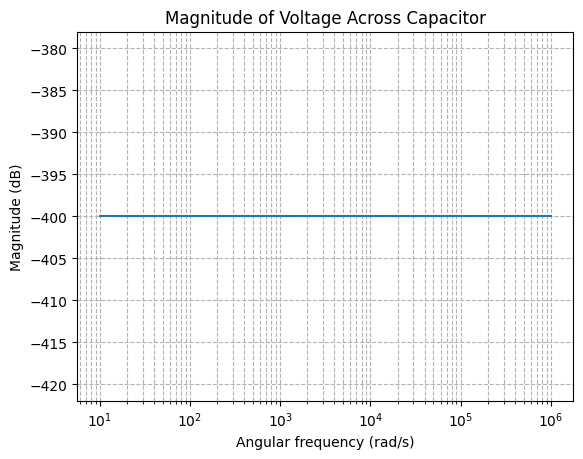

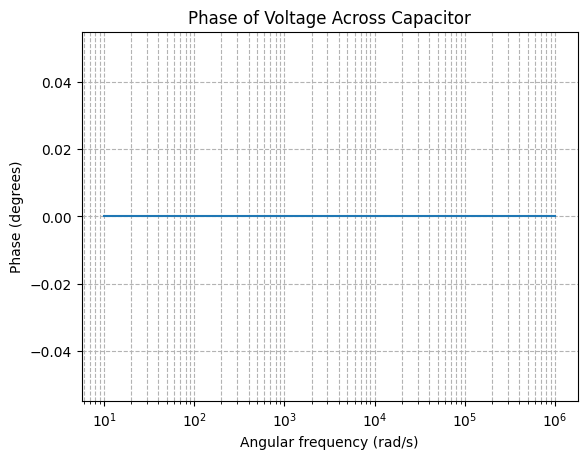

In [4]:
from lcapy import Circuit, j, omega
import numpy as np
import matplotlib.pyplot as plt

# Define the circuit with an AC source
cct = Circuit("""
V1 0 2 {220 * sin(2 * pi * 50 * t)}; down
R1 2 3 50; right
C1 3 4 0.0001; right, size=1.5
W 4 0; up, size=1.5
""")

# Define a range of angular frequencies for the analysis
omega = np.logspace(1, 6, 400)  # From 10^1 to 10^6 rad/s

# Calculate the voltage across the capacitor and its magnitude and phase
Vc = cct.C1.V.frequency_response(omega)

# Add a small number to avoid log10(0). Use np.maximum to ensure the argument is never zero.
Vc_mag = 20 * np.log10(np.maximum(abs(Vc), 1e-20))

Vc_phase = np.angle(Vc, deg=True)

# Plot the magnitude of the voltage across the capacitor
plt.figure()
plt.semilogx(omega, Vc_mag)
plt.title('Magnitude of Voltage Across Capacitor')
plt.xlabel('Angular frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which='both', linestyle='--', color='0.7')

# Plot the phase of the voltage across the capacitor
plt.figure()
plt.semilogx(omega, Vc_phase)
plt.title('Phase of Voltage Across Capacitor')
plt.xlabel('Angular frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.grid(True, which='both', linestyle='--', color='0.7')
plt.show()


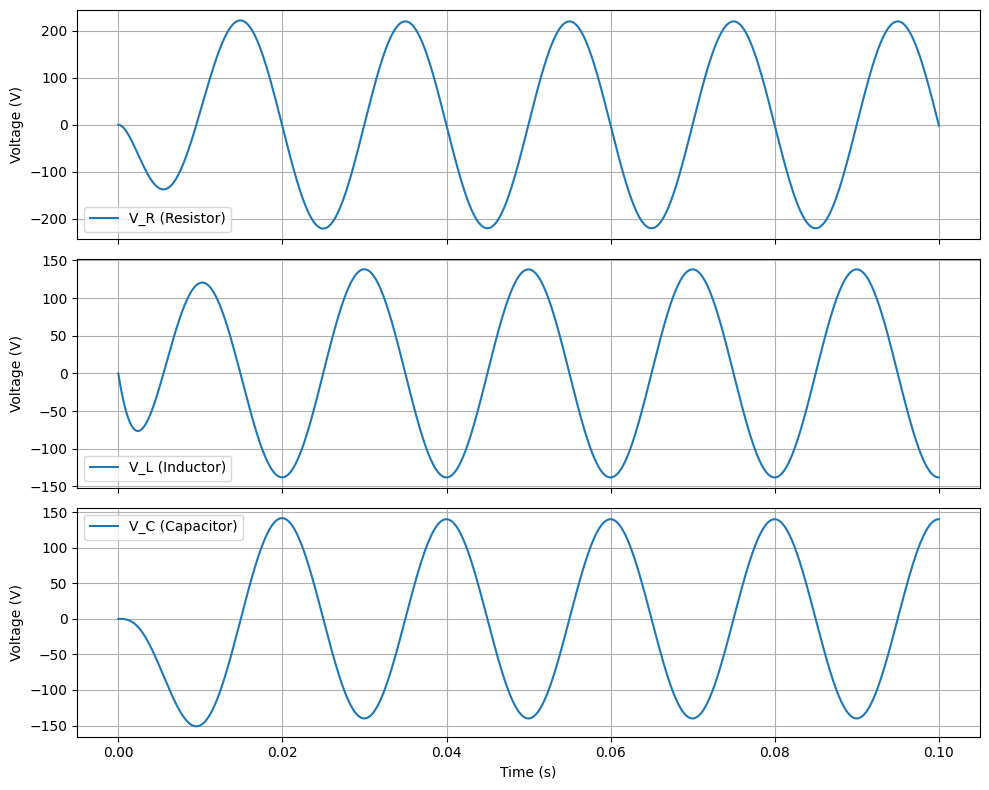

In [12]:
from lcapy import Circuit
from numpy import linspace
import matplotlib.pyplot as plt

# Define an RLC circuit with a sinusoidal voltage source
cct = Circuit('''
V1 0 1 {220 * sin(2 * pi * 50 * t)}; down
R1 1 2 50; right
L1 2 3 0.1; right=2
C1 3 0 0.0001; down, size=1.5
''')

# Time vector from 0 to 0.1 seconds, 1000 points
tv = linspace(0, 0.1, 1000)

# Perform simulation
results = cct.sim(tv)

# Create plots for the voltage across R, L, and C
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plotting voltage across the Resistor
axes[0].plot(tv, results.R1.v, label='V_R (Resistor)')
axes[0].set_ylabel('Voltage (V)')
axes[0].legend()
axes[0].grid(True)

# Plotting voltage across the Inductor
axes[1].plot(tv, results.L1.v, label='V_L (Inductor)')
axes[1].set_ylabel('Voltage (V)')
axes[1].legend()
axes[1].grid(True)

# Plotting voltage across the Capacitor
axes[2].plot(tv, results.C1.v, label='V_C (Capacitor)')
axes[2].set_ylabel('Voltage (V)')
axes[2].legend()
axes[2].grid(True)

axes[2].set_xlabel('Time (s)')

plt.tight_layout()  # Adjust the layout to make room for all plots
plt.savefig('RLC_voltages.png')  # Save the figure as an image file
plt.show()  # Show the plot in the notebook


In [14]:
from lcapy import Circuit, j, omega
import matplotlib.pyplot as plt
import numpy as np

# Frequency in Hz
f = 50
# Convert frequency to angular frequency in radians
w = 2 * np.pi * f

# Define the circuit with an AC source
cct = Circuit("""
V1 1 0 {cos(omega*t)}; down
R1 1 2 50; right, size=1.5
L1 2 3 0.1; right, size=1.5
C1 3 0 0.0001; down, size=1.5
""").subs({'omega': w})

# Calculate phasors for voltage across each component
VR = cct.R1.v.phasor(j * w)
VL = cct.L1.v.phasor(j * w)
VC = cct.C1.v.phasor(j * w)
I = cct.V1.i.phasor(j * w)

# Prepare for plotting
fig, ax = plt.subplots()
ax.quiver(0, 0, VR.real, VR.imag, angles='xy', scale_units='xy', scale=1, color='r', label='V_R')
ax.quiver(0, 0, VL.real, VL.imag, angles='xy', scale_units='xy', scale=1, color='g', label='V_L')
ax.quiver(0, 0, VC.real, VC.imag, angles='xy', scale_units='xy', scale=1, color='b', label='V_C')
ax.quiver(0, 0, I.real, I.imag, angles='xy', scale_units='xy', scale=1, color='y', label='I')

# Set graph properties
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.legend()
ax.set_title('Phasor Diagram')
plt.grid(True)
plt.show()


TypeError: TimeDomainExpression.phasor() takes 1 positional argument but 2 were given

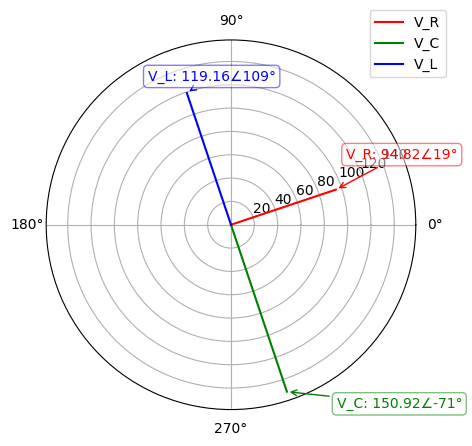

Vr: (89.9146111769851+30.113515480429967j)
Vr: (-37.84175960283254+112.99003276959965j)
Vr: (47.92714842584744-143.10354825002963j)


In [88]:
from matplotlib.pyplot import figure, show, xlabel, ylabel, legend
from lcapy import *
from sympy import *
import cmath
from numpy import pi

def evaluate_complex_expression(expression):
    # Define a safe list of functions and constants
    safe_dict = {
        'sqrt': cmath.sqrt,
        'exp': cmath.exp,
        'atan': cmath.atan,
        'pi': cmath.pi,
        'j': 1j,  # Imaginary unit
    }

    # Evaluate the expression safely
    try:
        result = -j*eval(expression, {"__builtins__": None}, safe_dict)
    except Exception as e:
        # Handle error (here we just print it, but you might want to handle it differently)
        print(f"Error evaluating expression: {e}")
        return None  # or raise an exception, or handle it as you see fit

    # Ensure the result is treated as a complex number
    return complex(result)

# Define an AC circuit
cct = Circuit("""
V1 0 1 {100 * sin(2 * pi * 50 * t)};
R1 1 2 5;
C1 2 3 400e-6;
L1 3 0 20e-3;
""")

# Perform AC analysis by substituting source voltage and converting to frequency domain
cct_ac = cct.ac()

# Correctly calling the phasor method to obtain the phasors for voltages across components
VR_phasor = cct_ac.R1.v.phasor()
VL_phasor = cct_ac.L1.v.phasor()
VC_phasor = cct_ac.C1.v.phasor()
# print(VL_phasor)

e1=str(VR_phasor)
e2=str(VC_phasor)
e3=str(VL_phasor)

# Evaluate the expression
VR = evaluate_complex_expression(e1)
VC = evaluate_complex_expression(e2)
VL = evaluate_complex_expression(e3)

# List of the complex numbers for iteration
phasors = [VR, VC, VL]
labels = ['V_R', 'V_C', 'V_L']
colors = ['red', 'green', 'blue']  # Different color for each phasor

# Plotting on polar projection
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Iterate over each phasor to plot
for phasor, label, color in zip(phasors, labels, colors):
    magnitude, angle = polar(phasor)
    ax.plot([0, angle], [0, magnitude], color=color, label=label)
    mag = magnitude
    angle_deg = np.degrees(angle)  # Convert angle to degrees
    annotation = f'{label}: {mag:.2f}∠{angle_deg:.0f}°'
    ax.annotate(annotation, xy=(angle, magnitude), xytext=(angle + 0.2, magnitude + magnitude*0.2),
                textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=color, alpha=0.5), color=color)

# Enhance the plot
ax.set_thetagrids(range(0, 360, 90), labels=['0°', '90°', '180°', '270°'])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

# # Create a new figure for plotting
# fig = figure()
# ax = fig.add_subplot(1, 1, 1)

# # Function to plot a phasor with arrowhead
# def plot_phasor_with_arrow(ax, phasor, color, label):
#     ax.quiver(0, 0, phasor.real, phasor.imag, angles='xy', scale_units='xy', scale=100, color=color, label=label)
#     ax.text(phasor.real, phasor.imag, f'  {label}', verticalalignment='bottom')

# # Plotting the phasors with arrowheads
# plot_phasor_with_arrow(ax, r1, 'r', 'V_R')
# plot_phasor_with_arrow(ax, r2, 'b', 'V_L')
# plot_phasor_with_arrow(ax, r3, 'g', 'V_C')

# # Adding features to the plot
# ax.axhline(0, color='black', linewidth=0.5)
# ax.axvline(0, color='black', linewidth=0.5)
# ax.grid(color='gray', linestyle='--', linewidth=0.5)
# xlabel('Real')
# ylabel('Imaginary')
# legend()

# # Set the aspect of the plot to be equal, so circles appear as circles (important for phasor diagrams)
# ax.set_aspect('equal')

# # Display the plot
# show()

# # Create a new figure for plotting
# fig = figure()
# ax = fig.add_subplot(1, 1, 1)

# # Plotting the phasors
# # For VR
# ax.plot(r1.real, r1.imag, 'ro', label='V_R')
# # For VL
# ax.plot(r2.real, r2.imag, 'bo', label='V_L')
# # For VC
# ax.plot(r3.real, r3.imag, 'go', label='V_C')

# # Annotate the points
# ax.text(r1.real, r1.imag, '  V_R', verticalalignment='bottom')
# ax.text(r2.real, r2.imag, '  V_L', verticalalignment='bottom')
# ax.text(r3.real, r3.imag, '  V_C', verticalalignment='bottom')

# # Adding features to the plot
# ax.axhline(0, color='black',linewidth=0.5)
# ax.axvline(0, color='black',linewidth=0.5)
# ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
# xlabel('Real')
# ylabel('Imaginary')
# legend()

# # Display the plot
# show()

# Output the result
print(f"Vr: {VR}")
print(f"Vr: {VL}")
print(f"Vr: {VC}")
# phasor(VR).plot()

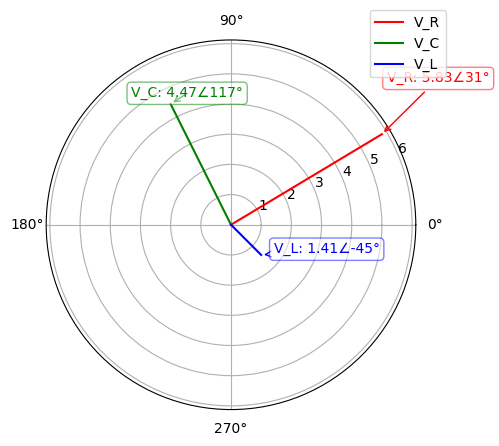

In [73]:
from cmath import polar, phase
from matplotlib import pyplot as plt
import numpy as np

# Define phasors as complex numbers
VR = complex(5, 3)  # Example value for V_R
VC = complex(-2, 4)  # Example value for V_C
VL = complex(1, -1)  # Example value for V_L

# List of the complex numbers for iteration
phasors = [VR, VC, VL]
labels = ['V_R', 'V_C', 'V_L']
colors = ['red', 'green', 'blue']  # Different color for each phasor

# Plotting on polar projection
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Iterate over each phasor to plot
for phasor, label, color in zip(phasors, labels, colors):
    magnitude, angle = polar(phasor)
    ax.plot([0, angle], [0, magnitude], color=color, label=label)
    mag = magnitude
    angle_deg = np.degrees(angle)  # Convert angle to degrees
    annotation = f'{label}: {mag:.2f}∠{angle_deg:.0f}°'
    ax.annotate(annotation, xy=(angle, magnitude), xytext=(angle + 0.2, magnitude + magnitude*0.2),
                textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=color, alpha=0.5), color=color)

# Enhance the plot
ax.set_thetagrids(range(0, 360, 90), labels=['0°', '90°', '180°', '270°'])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [12]:
from lcapy import Circuit
import cmath
from numpy import pi

# Define constants
pi = cmath.pi
j=1j

# Example: Analyzing a series RLC circuit
# The circuit is assumed to have a sinusoidal voltage source, a resistor (R), an inductor (L), and a capacitor (C) all in series.

# Define the circuit
cct = Circuit("""
V1 0 1 {220 * sin(2 * pi * 50 * t)}; down
R1 1 2 50; right
L1 2 3 0.1; right=2
C1 3 0 0.0001; down, size=1.5
""")

# # Set the parameters for the source and components
# cct.V1.V = 'V0 * cos(omega * t + phi)'  # V0 is the amplitude, omega is the angular frequency, and phi is the phase angle of the source.
# cct.R1.R = 'R'  # Resistance
# cct.L1.L = 'L'  # Inductance
# cct.C1.C = 'C'  # Capacitance

# Now, you might want to analyze a specific aspect, like finding the phasor of the voltage across the capacitor
V_C = cct.C1.v.phasor()

print(V_C)

# This will give you the phasor representation of the voltage across the capacitor.
# You can also analyze currents, voltages across other components, or the total impedance seen by the source in a similar way.

# For example, finding the total impedance of the circuit
Z_total = cct.impedance()

# And the phasor representation of the source current
I_source = cct.I(1).phasor()

print(Z_total, I_source)


sqrt((-2200*pi**2/(5*pi**2 + pi**4 + 100) + 22000/(5*pi**2 + pi**4 + 100))**2 + 121000000*pi**2/(5*pi**2 + pi**4 + 100)**2)*exp(j*atan((-2200*pi**2/(5*pi**2 + pi**4 + 100) + 22000/(5*pi**2 + pi**4 + 100))*(5*pi**2 + pi**4 + 100)/(11000*pi)))


TypeError: NetlistOpsMixin.impedance() missing 1 required positional argument: 'Np'

<PolarAxes: >

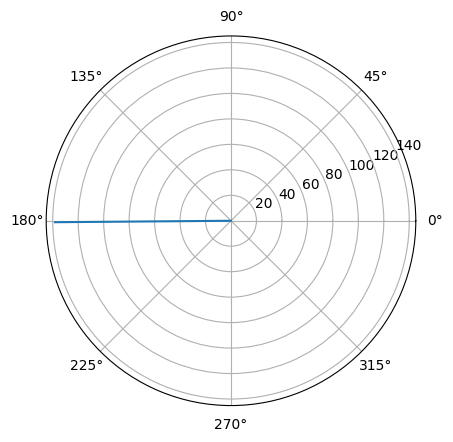

In [34]:
from matplotlib.pyplot import savefig
from lcapy import *
from sympy import *
import cmath
from numpy import pi
import math

# Assuming 'result' is the complex number you've obtained
result = 140.0466992169867 + 1.1625614924322467j

# Now, use this function with your result
phasor(-138.2205518950009 + -1.1474022022246573j).plot()
